In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve
from scipy.fft import fft, fftfreq
import numpy as np
import matplotlib.pyplot as plt

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


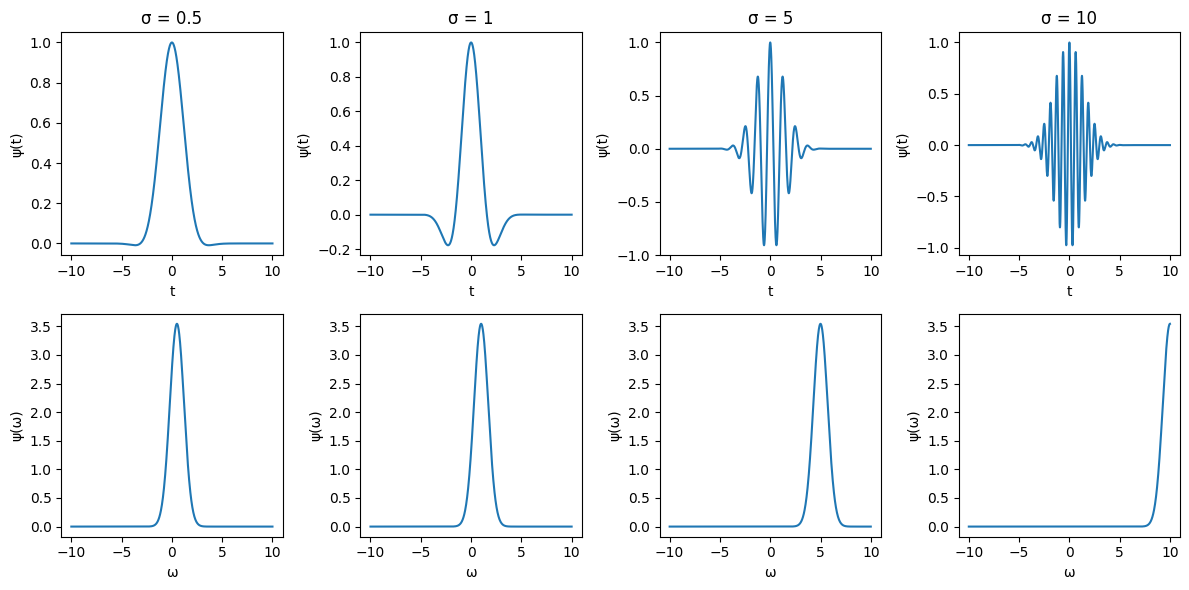

In [58]:


# Параметры
alpha = 2  # Параметр масштаба
omegas = [0.5,1,5,10]  # Основная частота фильтрации
t = np.linspace(-10, 10, 10000)

# Графики
plt.figure(figsize=(12, 6))

for i, omega_0 in enumerate(omegas):
    # Вейвлет "Мексиканская шляпа" во временном пространстве
    psi_t = np.exp(-t**2 / alpha**2) * np.exp(1j * omega_0 * t)
    
    # Вейвлет "Мексиканская шляпа" в частотном пространстве
    omega = np.linspace(-10, 10, 1000)
    psi_omega = alpha * np.sqrt(np.pi) * np.exp(-alpha**2 * (omega - omega_0)**2 / 4)
    
    # Графики
    plt.subplot(2, len(omegas), i + 1)
    plt.plot(t, psi_t)
    plt.title(f'σ = {omega_0}')
    plt.xlabel('t')
    plt.ylabel('ψ(t)')
    
    plt.subplot(2, len(omegas), len(omegas) + i + 1)
    plt.plot(omega, psi_omega)
    plt.xlabel('ω')
    plt.ylabel('ψ(ω)')

plt.tight_layout()
plt.show()

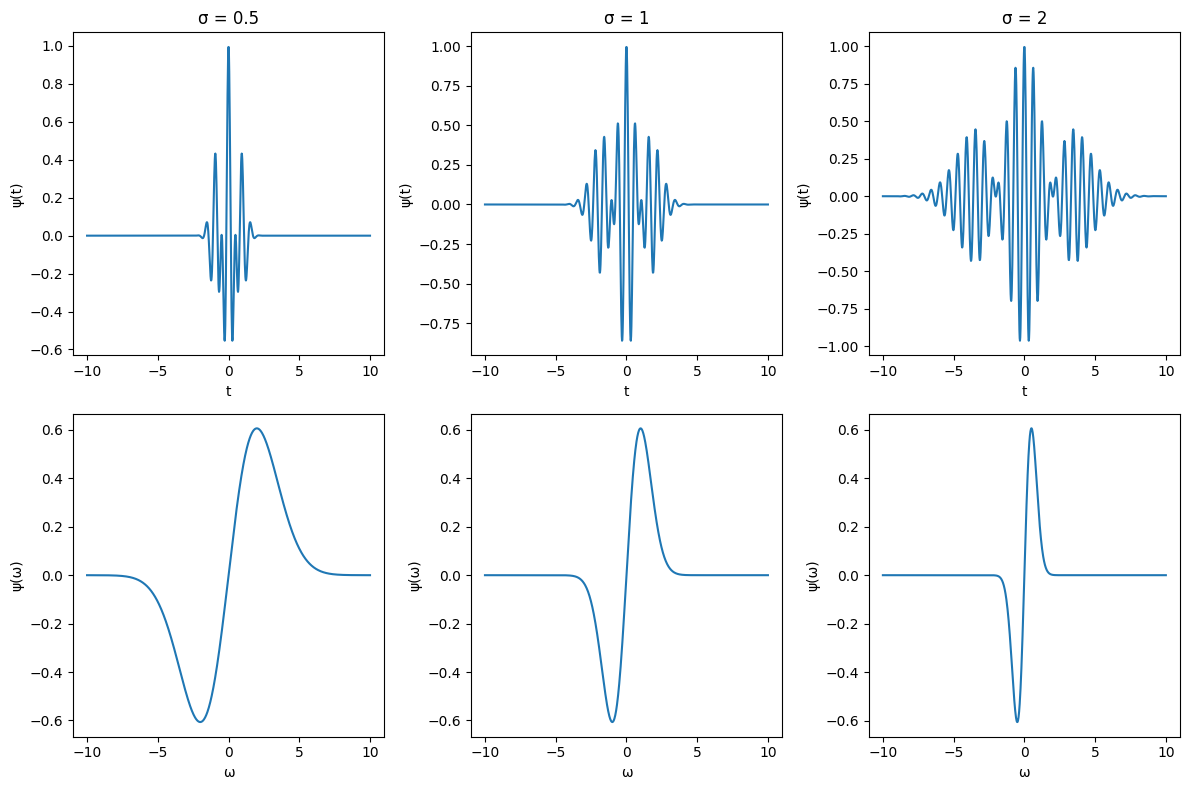

In [161]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры
sigma_values = [0.5, 1, 2]  # Разные значения параметра масштаба
t0 = 0  # Смещение во времени
t = np.linspace(-10, 10, 1000)

omega_0_mexhat = 10

# Графики для разных значений sigma
plt.figure(figsize=(12, 8))

for i, sigma in enumerate(sigma_values):
    # Вейвлет "Мексиканская шляпа" во временном пространстве
    psi_t = (1 - (t - t0)**2 / sigma**2) * np.exp(-(t - t0)**2 / (2 * sigma**2))  * np.exp(1j * omega_0_mexhat * t)
    
    # Вейвлет "Мексиканская шляпа" в частотном пространстве
    omega = np.linspace(-10, 10, 1000)
    psi_omega = sigma * omega * np.exp(-sigma**2 * omega**2 / 2)
    
    # Графики
    plt.subplot(2, len(sigma_values), i + 1)
    plt.plot(t, psi_t)
    plt.title(f'σ = {sigma}')
    plt.xlabel('t')
    plt.ylabel('ψ(t)')
    
    plt.subplot(2, len(sigma_values), len(sigma_values) + i + 1)
    plt.plot(omega, psi_omega)
    plt.xlabel('ω')
    plt.ylabel('ψ(ω)')

plt.tight_layout()
plt.show()

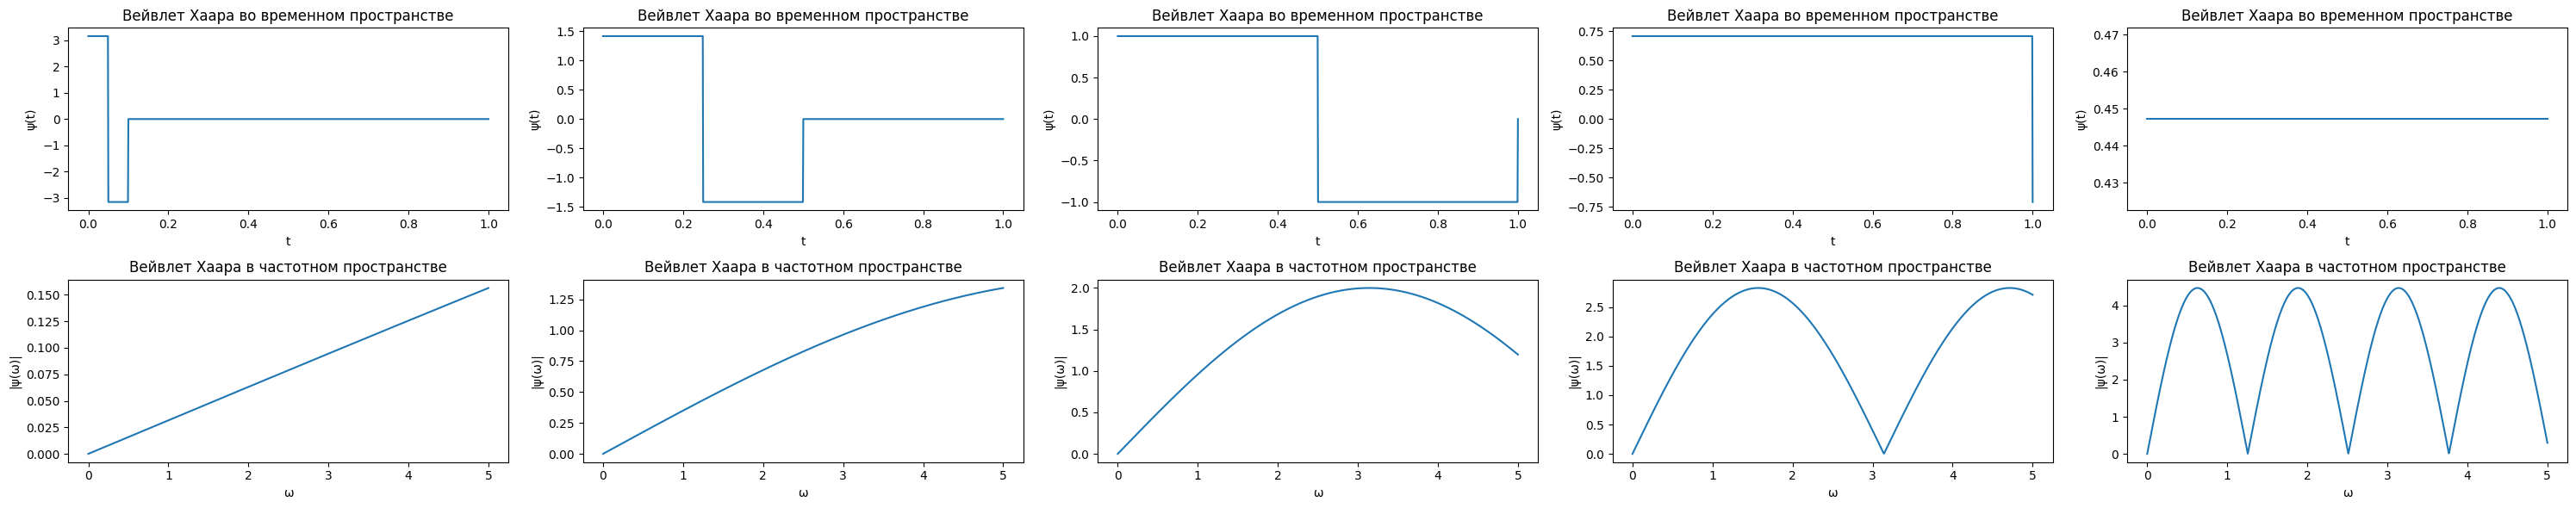

In [60]:
import numpy as np
import matplotlib.pyplot as plt


alpha_values = [0.1,0.5, 1, 2, 5]
plt.figure(figsize=(30, 6))
for i, alpha in enumerate(alpha_values):
    t = np.linspace(0, 1, 1000)

    psi_t_a = np.zeros_like(t)
    psi_t_a[(t/alpha >= 0) & (t/alpha < 0.5)] = 1
    psi_t_a[(t/alpha >= 0.5) & (t/alpha < 1)] = -1
    psi_t_a = (1/np.sqrt(alpha)) * psi_t_a

    omega = np.linspace(0, 5, 1000)

    psi_omega_a = np.sqrt(alpha) * (2j * np.sin((omega*alpha) / 2) * np.exp(-1j * (omega*alpha) / 2))

    # Графики

    plt.subplot(2, len(alpha_values), i + 1)
    plt.plot(t, psi_t_a)
    plt.title('Вейвлет Хаара во временном пространстве')
    plt.xlabel('t')
    plt.ylabel('ψ(t)')

    plt.subplot(2, len(alpha_values),len(alpha_values) + i + 1)
    plt.plot(omega, np.abs(psi_omega_a))
    plt.title('Вейвлет Хаара в частотном пространстве')
    plt.xlabel('ω')
    plt.ylabel('|ψ(ω)|')

plt.tight_layout()
plt.show()

In [61]:
def plot_spectrum(signal, title, fs=1000):
    N = len(signal)
    T = 1.0 / fs
    yf = fft(signal)
    xf = fftfreq(N, T)[:N//2]
    plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    plt.title(title)
    plt.xlabel('Частота [Гц]')
    plt.ylabel('Амплитуда')

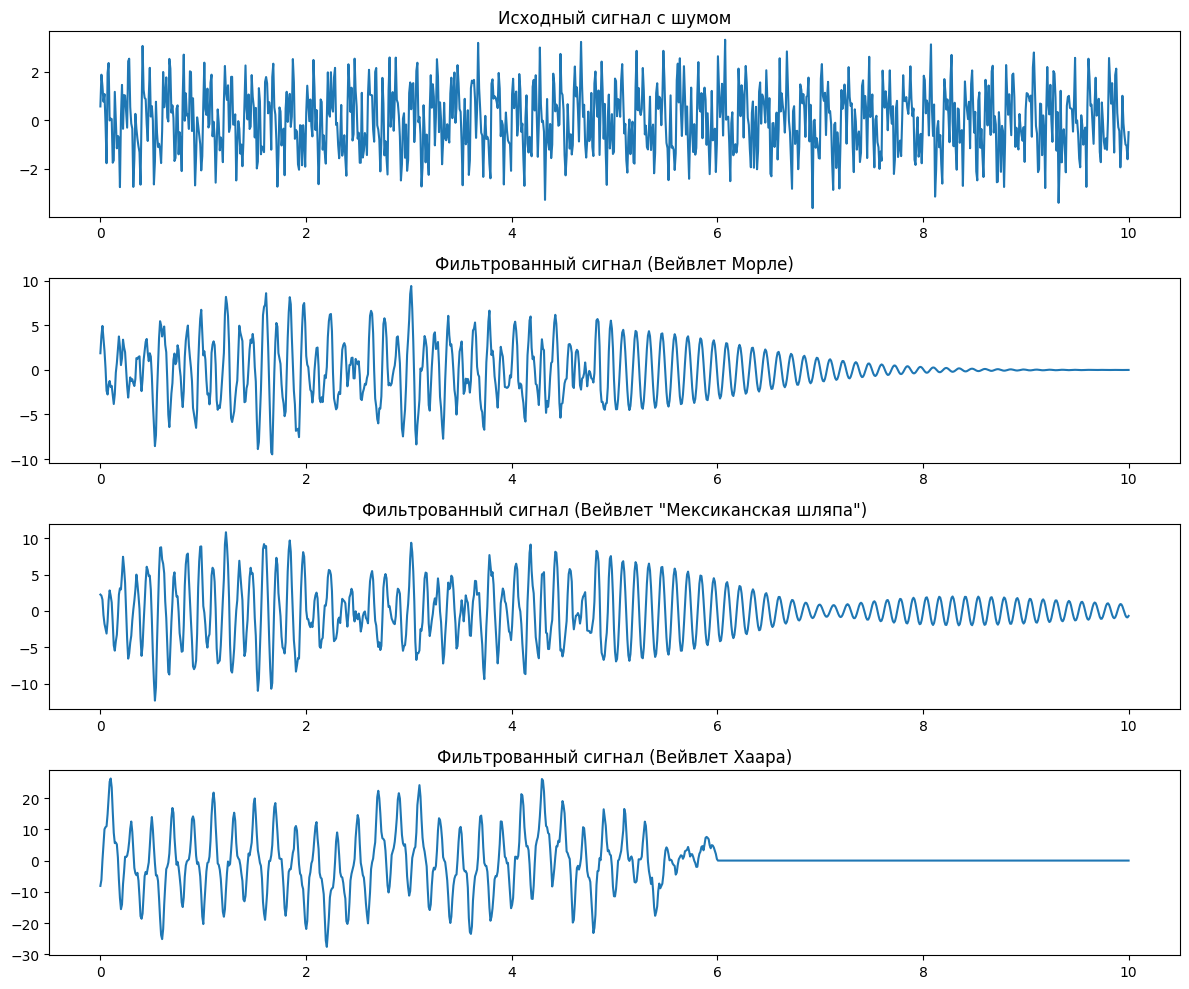

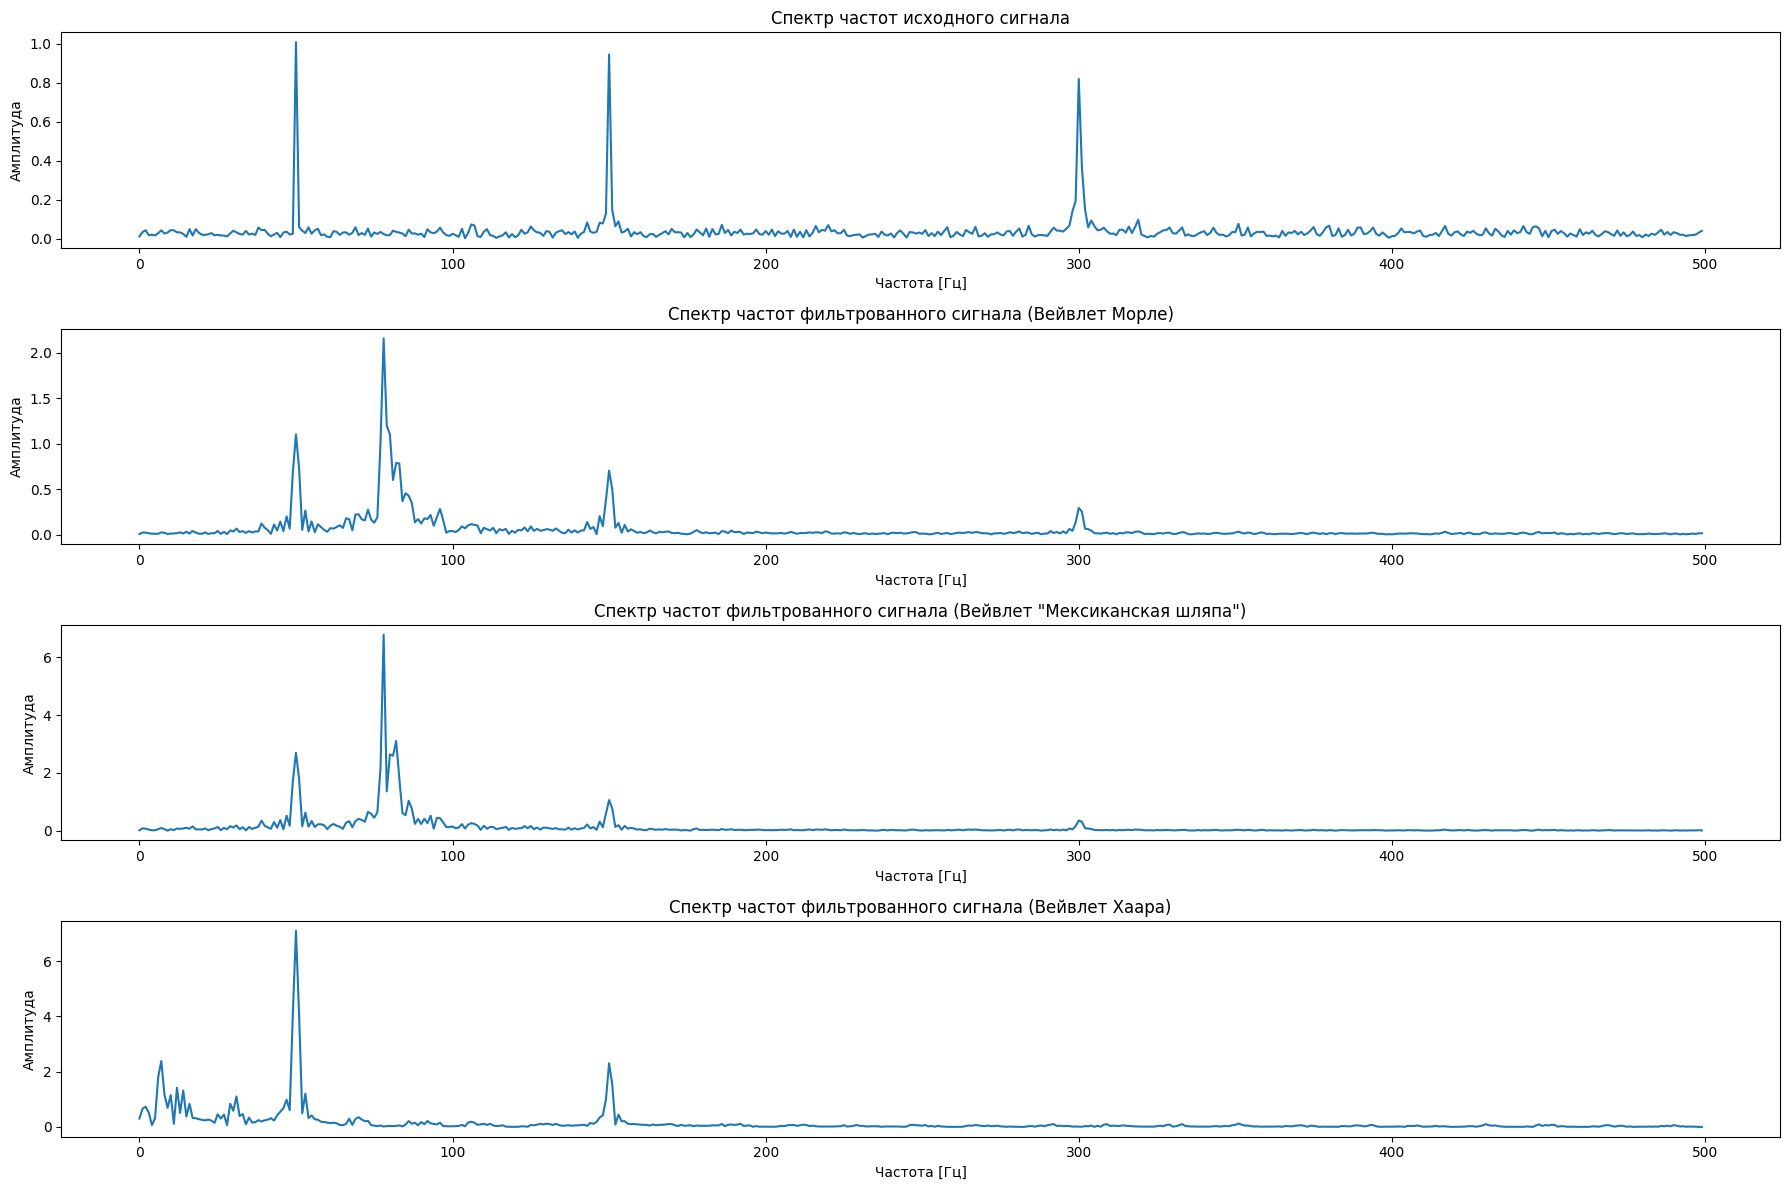

In [78]:


# Генерация сигнала с шумом
t = np.linspace(0, 10, 1000)
signal = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 15 * t) + np.sin(2 * np.pi * 30 * t) + np.random.normal(0, 0.5, 1000)

# Вейвлет Морле
alpha = 2
omega_0_morlet = 50
psi_t_morlet = np.exp(-t**2 / alpha**2) * np.exp(1j * omega_0_morlet * t)
filtered_signal_morlet = convolve(signal, np.real(psi_t_morlet), mode='same')

# Вейвлет "Мексиканская шляпа"
sigma = 2
t0 = 0
omega_0_mexhat = 50
psi_t_mexhat = (1 - (t - t0)**2 / sigma**2) * np.exp(-(t - t0)**2 / (2 * sigma**2)) * np.exp(1j * omega_0_mexhat * t)
filtered_signal_mexhat = convolve(signal, psi_t_mexhat, mode='same')

# Вейвлет Хаара
psi_t_haar = np.zeros_like(t)
psi_t_haar[(t >= 0) & (t < 0.5)] = 1
psi_t_haar[(t >= 0.5) & (t < 1)] = -1
filtered_signal_haar = convolve(signal, psi_t_haar, mode='same')

# Графики
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.plot(t, signal)
plt.title('Исходный сигнал с шумом')

plt.subplot(4, 1, 2)
plt.plot(t, filtered_signal_morlet)
plt.title('Фильтрованный сигнал (Вейвлет Морле)')

plt.subplot(4, 1, 3)
plt.plot(t, filtered_signal_mexhat)
plt.title('Фильтрованный сигнал (Вейвлет "Мексиканская шляпа")')

plt.subplot(4, 1, 4)
plt.plot(t, filtered_signal_haar)
plt.title('Фильтрованный сигнал (Вейвлет Хаара)')

plt.tight_layout()
plt.show()

# Функция для построения спектра частот

# Графики спектров частот
plt.figure(figsize=(18, 12))

plt.subplot(4, 1, 1)
plot_spectrum(signal, 'Спектр частот исходного сигнала')

plt.subplot(4, 1, 2)
plot_spectrum(filtered_signal_morlet, 'Спектр частот фильтрованного сигнала (Вейвлет Морле)')

plt.subplot(4, 1, 3)
plot_spectrum(filtered_signal_mexhat, 'Спектр частот фильтрованного сигнала (Вейвлет "Мексиканская шляпа")')

plt.subplot(4, 1, 4)
plot_spectrum(filtered_signal_haar, 'Спектр частот фильтрованного сигнала (Вейвлет Хаара)')

plt.tight_layout()
plt.show()

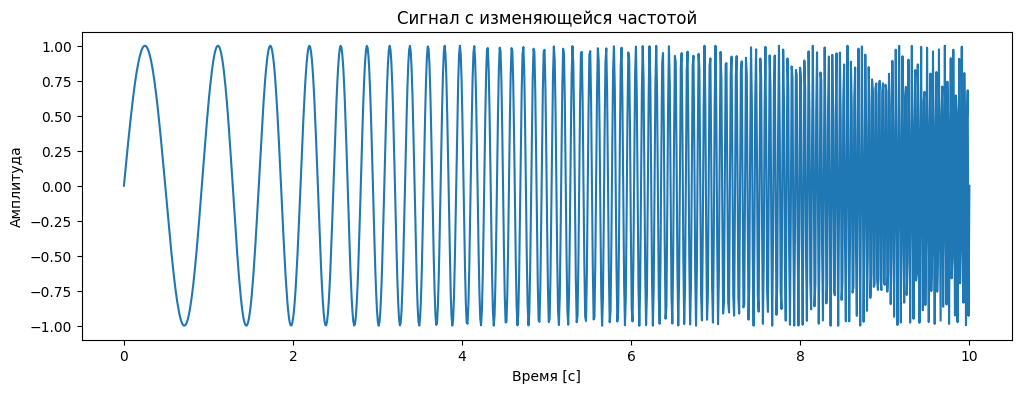

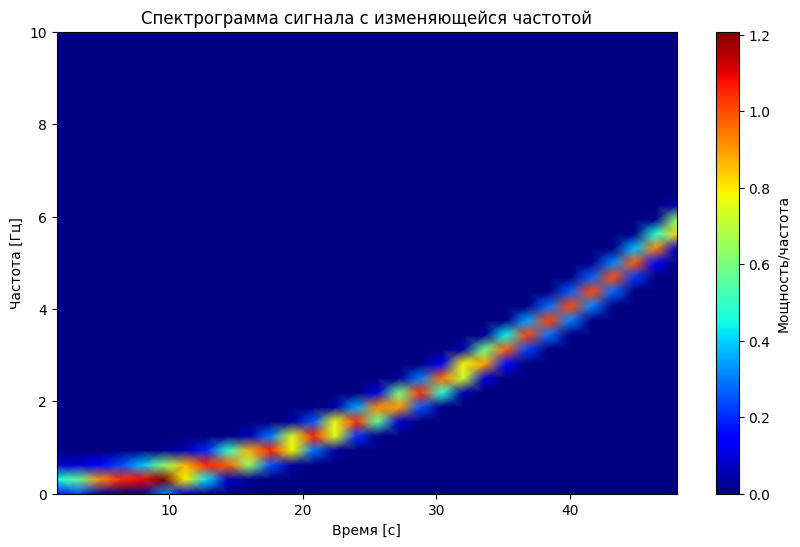

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Генерация сигнала с изменяющейся частотой
t = np.linspace(0, 10, 1000)
signal = np.sin(2 * np.pi * t * (1 + 0.1*pow(t,2)))

# График сигнала во временной области
plt.figure(figsize=(12, 4))
plt.plot(t, signal)
plt.title('Сигнал с изменяющейся частотой')
plt.xlabel('Время [с]')
plt.ylabel('Амплитуда')
plt.show()

# Параметры спектрограммы
fs = 20  # Частота дискретизации
window = 'hann'  # Окно Ханна
nperseg = 64  # Длина сегмента
noverlap = 32  # Перекрытие сегментов

# Вычисление спектрограммы
f, t, Sxx = spectrogram(signal, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap)

# График спектрограммы
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, Sxx, shading='gouraud', cmap='jet')
plt.title('Спектрограмма сигнала с изменяющейся частотой')
plt.ylabel('Частота [Гц]')
plt.xlabel('Время [с]')
plt.colorbar(label='Мощность/частота')
plt.show()

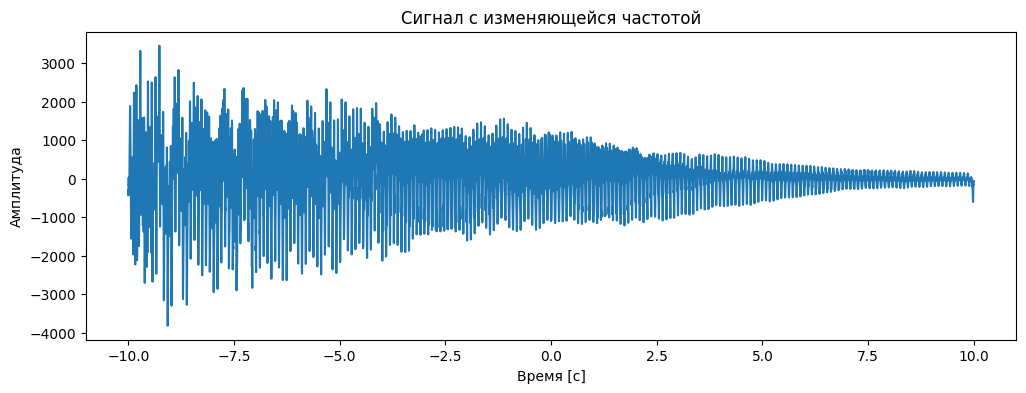

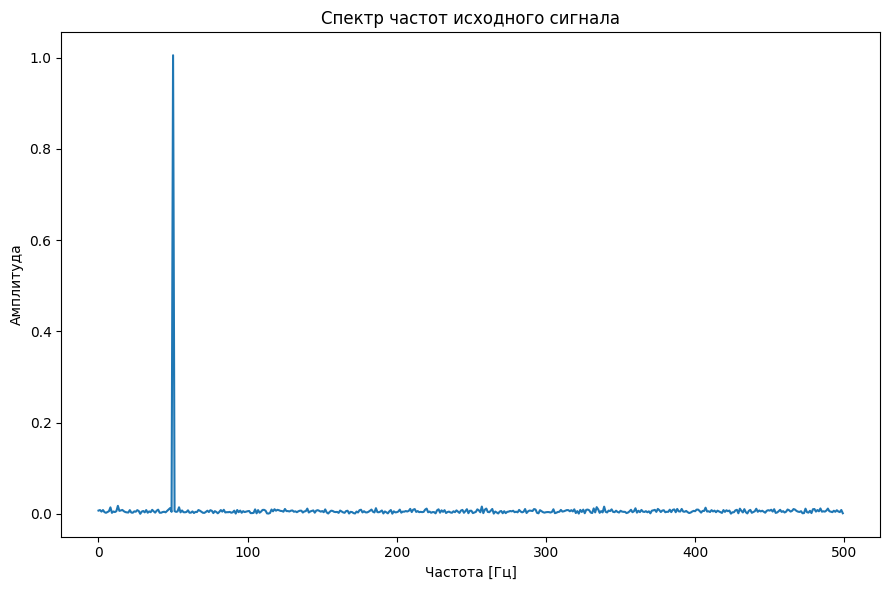

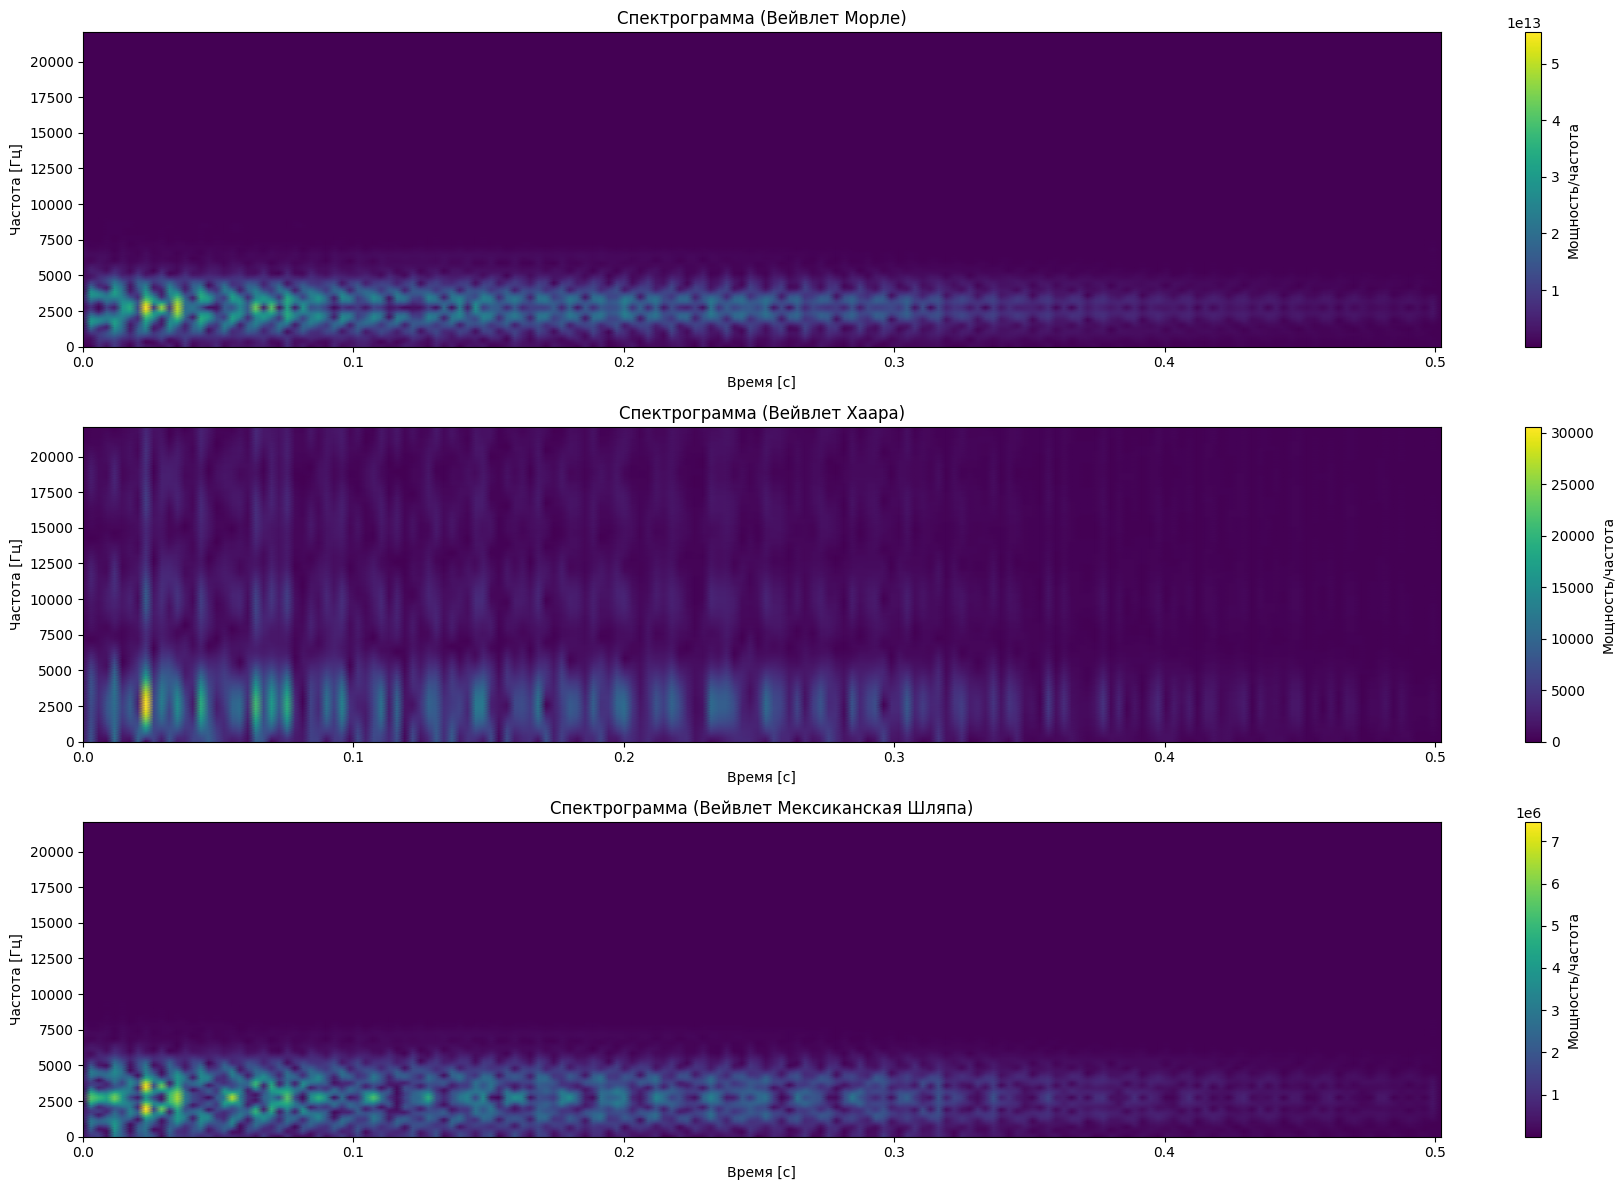

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import stft

# Загрузка аудиофайла
fs, audio_data = wavfile.read('nota-lya.wav')


if audio_data.ndim > 1:
    audio_data = np.mean(audio_data, axis=1)


# Параметры STFT
nperseg = 256  # Длина сегмента
noverlap = 128  # Перекрытие сегментов

# Вейвлет Морле
alpha = 2
omega_0_morlet = 5
t = np.linspace(-10, 10, nperseg)  # Длина окна должна совпадать с nperseg
psi_t_morlet = np.exp(-t**2 / alpha**2) * np.exp(1j * omega_0_morlet * t)

# Вейвлет Хаара
psi_t_haar = np.zeros_like(t)
psi_t_haar[(t >= 0) & (t < 0.5)] = 1
psi_t_haar[(t >= 0.5) & (t < 1)] = -1

# Вейвлет "Мексиканская шляпа"
sigma = 1
omega_0_mexhat = 5
t0 = 0
psi_t_mexhat = (1 - (t - t0)**2 / sigma**2) * np.exp(-(t - t0)**2 / (2 * sigma**2)) * np.exp(1j * omega_0_mexhat * t)

# STFT с использованием вейвлетов
f_morlet, t_morlet, Zxx_morlet = stft(audio_data, fs=fs, window=np.real(psi_t_morlet), nperseg=nperseg, noverlap=noverlap)
f_haar, t_haar, Zxx_haar = stft(audio_data, fs=fs, window=psi_t_haar, nperseg=nperseg, noverlap=noverlap)
f_mexhat, t_mexhat, Zxx_mexhat = stft(audio_data, fs=fs, window=psi_t_mexhat, nperseg=nperseg, noverlap=noverlap)
# print(f_morlet,f_haar,f_mexhat)

# Графики
plt.figure(figsize=(9, 6))
plot_spectrum(signal, 'Спектр частот исходного сигнала')
plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 12))

plt.subplot(3, 1, 1)
plt.pcolormesh(t_morlet, f_morlet, np.abs(Zxx_morlet), shading='gouraud')
plt.title('Спектрограмма (Вейвлет Морле)')
plt.ylabel('Частота [Гц]')
plt.xlabel('Время [с]')
plt.colorbar(label='Мощность/частота')

plt.subplot(3, 1, 2)
plt.pcolormesh(t_haar, f_haar, np.abs(Zxx_haar), shading='gouraud')
plt.title('Спектрограмма (Вейвлет Хаара)')
plt.ylabel('Частота [Гц]')
plt.xlabel('Время [с]')
plt.colorbar(label='Мощность/частота')

plt.subplot(3, 1, 3)
plt.pcolormesh(t_mexhat, f_mexhat, np.abs(Zxx_mexhat), shading='gouraud')
plt.title('Спектрограмма (Вейвлет Мексиканская Шляпа)')
plt.ylabel('Частота [Гц]')
plt.xlabel('Время [с]')
plt.colorbar(label='Мощность/частота')

plt.tight_layout()
plt.show()